Ottawa 67's Project Rebound Classifier

Description: 

We first need to import the required dependencies and will do this below.

In [2]:
from Rebounds import classify_rebounds
import pandas as pd
pd.set_option('display.max_columns', 500)


We are working with a dataset given from the Ottawa 67's Hockey club and will run some data manipulation and visualization techniques on it to get a better understanding of what we have. First I will import it into a pandas dataframe and run some basic description functions.

In [3]:
shot_df = pd.read_csv('Ottawa67sShotData.csv')
shot_df.describe(include='all')

,game_date,period,video_time,team_name,strength,position,name,xG,shot category,location,outcome,after rebound,one-timer,deflected,after cross-ice pass,after DzG pass,pass from high zone,pass from medium zone,pass from low zone,pass from perimeter zone,received in high zone,received in medium zone,received in low zone,received in perimeter zone,created rebound,possession after shot,PP,PK,EN,first minute,last minute
count,6621,6621.000000,6621,6621,6621,6621,6621,6621.000000,6621,6621,6615,283,1656,260,1077,965,151,413,747,3307,585,724,954,2354,2315,2644,1230,161,21,300,371
unique,58,NaN,3115,21,13,3,416,NaN,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,2019-02-08,NaN,0 days 00:33:54.000000000,Ottawa 67's,5-5,F,Tye Felhaber,NaN,OFF_OZ,PERIMETER,SOG,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
freq,139,NaN,8,3615,4936,4344,464,NaN,4585,2010,3407,283,1656,260,1077,965,151,413,747,3307,585,724,954,2354,2315,2644,1230,161,21,300,371
mean,NaN,2.028395,NaN,NaN,NaN,NaN,NaN,0.073977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.834007,NaN,NaN,NaN,NaN,NaN,0.082367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Right away we notice some interesting things. There is a total of 6621 shot attempts in our dataframe. We can see that there are 58 unique game dates implying that out dataset contains shots from 58 games. What is interesting and something we will explore later on in this notebook is that there are 2315 shot attempts that created a rebound and only 283 shots after a rebound. Another useful row is the "top" row. We can see that, as expected the Ottawa 67's have the most shot attempts (as this is data from only their games). Also that most shot attempts occur on 5-5, coming from forwards, after having O-zone pressure and being taken from the perimeter of the ice. These are interesting insights that we will use later on in our analysis.

In [4]:
shot_df.head()

,game_date,period,video_time,team_name,strength,position,name,xG,shot category,location,outcome,after rebound,one-timer,deflected,after cross-ice pass,after DzG pass,pass from high zone,pass from medium zone,pass from low zone,pass from perimeter zone,received in high zone,received in medium zone,received in low zone,received in perimeter zone,created rebound,possession after shot,PP,PK,EN,first minute,last minute
0,2018-09-21,1,0 days 00:01:38.000000000,Mississauga Steelheads,5-5,F,Nicholas Canade,0.06,OZ_FORECHECK,MEDIUM,SOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN
1,2018-09-21,1,0 days 00:02:13.000000000,Mississauga Steelheads,5-5,F,Cole Schwindt,0.04,OFF_OZ,PERIMETER,SOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
2,2018-09-21,1,0 days 00:02:52.000000000,Mississauga Steelheads,5-5,F,Cole Carter,0.05,OFF_OZ,MEDIUM,SOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-21,1,0 days 00:02:58.000000000,Mississauga Steelheads,5-5,D,Ryan Barbosa,0.01,OZ_FORECHECK,PERIMETER,BLOCKED,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-21,1,0 days 00:03:04.000000000,Ottawa 67's,5-5,F,William Sirman,0.01,OFF_OZ,PERIMETER,MISSED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


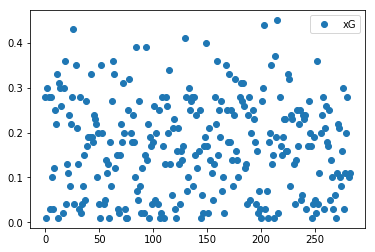

In [28]:
rebound_df = shot_df[(shot_df['after rebound'] =='yes')]
rebounds_df = rebound_df.reset_index(drop=True)
rebounds_df.plot(y = 'xG', use_index=True, style='o')


In [37]:
num_df = rebounds_df.replace('yes', 1)
num_df['location'].value_counts()

HIGH         179
PERIMETER     54
MEDIUM        35
LOW           15
Name: location, dtype: int64

Looking strictly at the rebound data, we notice that the "expected goal" value is more than doubled. We also notice that the percentages for rebounds on the powerplay and penalty kill mirrors the percentages for total shots on the powerplay and penalty kill.

In [33]:
numerical_df.describe()

,period,xG,location,after rebound,one-timer,deflected,after cross-ice pass,after DzG pass,pass from high zone,pass from medium zone,pass from low zone,pass from perimeter zone,received in high zone,received in medium zone,received in low zone,received in perimeter zone,created rebound,possession after shot,PP,PK,EN,first minute,last minute
count,283.000000,283.000000,283.000000,283.0,44.0,5.0,9.0,25.0,9.0,5.0,3.0,42.0,18.0,13.0,12.0,16.0,92.0,87.0,58.0,7.0,0.0,19.0,18.0
mean,2.060071,0.169505,2.961131,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
std,0.867005,0.106357,0.725846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
min,1.000000,0.010000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
25%,1.000000,0.075000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
50%,2.000000,0.170000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
75%,3.000000,0.250000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
max,4.000000,0.450000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
